In [1]:
from google.colab import files
uploaded = files.upload()


Saving clusteringmidtermysl.csv to clusteringmidtermysl.csv


In [34]:
import pandas as pd
import numpy as np

# Load dataset untuk clustering
df_cluster = pd.read_csv("clusteringmidtermysl.csv")

print("Dataset Shape:", df_cluster.shape)
display(df_cluster.head())

# Pilih hanya fitur numerik
X = df_cluster.select_dtypes(include=[np.number])
print("\nNumeric feature shape:", X.shape)


Dataset Shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Numeric feature shape: (8950, 17)


<Axes: >

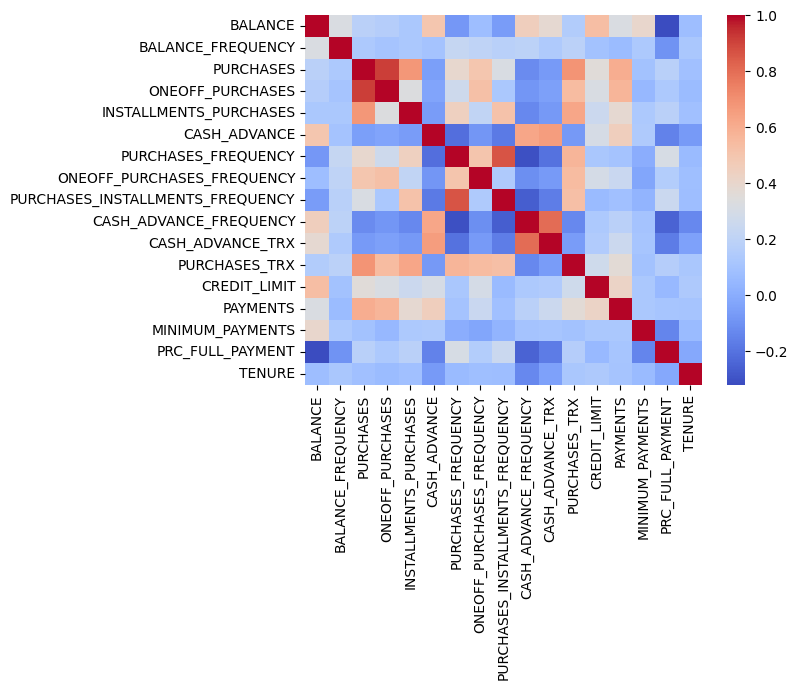

In [3]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
sns.heatmap(numeric_df.corr(), cmap="coolwarm")


In [5]:
from sklearn.preprocessing import StandardScaler

X = df.drop("CUST_ID", axis=1)   # Hilangkan ID
scaler = StandardScaler()
scaled = scaler.fit_transform(X)


In [6]:
# 1. Siapkan X (pastikan CUST_ID tidak ikut)
X = df.drop("CUST_ID", axis=1).copy()

# 2. Statistik sebelum scaling
print("=== Statistik SEBELUM scaling ===")
display(X.describe().T[['mean','std','min','25%','50%','75%','max']])

# 3. Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

# 4. Buat DataFrame dari hasil scaling (supaya mudah ditampilkan)
df_scaled = pd.DataFrame(scaled, columns=X.columns)

# 5. Statistik setelah scaling
print("\n=== Statistik SETELAH scaling ===")
display(df_scaled.describe().T[['mean','std','min','25%','50%','75%','max']])

# 6. Tampilkan 5 baris pertama sebelum & sesudah untuk perbandingan
print("\n=== Head: BEFORE vs AFTER (first 5 rows) ===")
display(pd.concat([X.head(), df_scaled.head()], axis=1, keys=['BEFORE','AFTER']))

# 7. Cek shape & missing values
print("\nShape original:", X.shape)
print("Shape scaled :", df_scaled.shape)
print("Missing values after scaling (per kolom):")
print(df_scaled.isna().sum())

# 8. Simpan hasil scaled ke file (opsional: untuk disubmit)
df_scaled.to_csv("clusteringmidtermysl_scaled.csv", index=False)
print("\nSaved scaled data to clusteringmidtermysl_scaled.csv")


=== Statistik SEBELUM scaling ===


,mean,std,min,25%,50%,75%,max
BALANCE,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000



=== Statistik SETELAH scaling ===


,mean,std,min,25%,50%,75%,max
BALANCE,-2.540488e-17,1.000056,-0.751640,-0.690008,-0.332029,0.235256,8.397489
BALANCE_FREQUENCY,1.587805e-16,1.000056,-3.703271,0.049045,0.518084,0.518084,0.518084
PURCHASES,3.175610e-18,1.000056,-0.469552,-0.451001,-0.300454,0.050047,22.483510
ONEOFF_PURCHASES,-6.033659e-17,1.000056,-0.356934,-0.356934,-0.334040,-0.009057,24.201066
INSTALLMENTS_PURCHASES,3.175610e-17,1.000056,-0.454576,-0.454576,-0.356156,0.063663,24.426889
CASH_ADVANCE,-6.351220e-18,1.000056,-0.466786,-0.466786,-0.466786,0.064352,22.011117
PURCHASES_FREQUENCY,9.328354e-17,1.000056,-1.221758,-1.014125,0.024043,1.062211,1.269843
ONEOFF_PURCHASES_FREQUENCY,1.905366e-17,1.000056,-0.678661,-0.678661,-0.399319,0.326973,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,0.970151,1.599199
CASH_ADVANCE_FREQUENCY,-1.595744e-16,1.000056,-0.675349,-0.675349,-0.675349,0.435149,6.820521



=== Head: BEFORE vs AFTER (first 5 rows) ===


BEFORE                                               \
       BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES   
0    40.900749          0.818182     95.40             0.00   
1  3202.467416          0.909091      0.00             0.00   
2  2495.148862          1.000000    773.17           773.17   
3  1666.670542          0.636364   1499.00          1499.00   
4   817.714335          1.000000     16.00            16.00   

                                                           \
  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY   
0                   95.4     0.000000            0.166667   
1                    0.0  6442.945483            0.000000   
2                    0.0     0.000000            1.000000   
3                    0.0   205.788017            0.083333   
4                    0.0     0.000000            0.083333   

                                                               \
  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY   
0                   0.000000                         0.083333   
1                   0.000000                         0.000000   
2                   1.000000                         0.000000   
3                   0.083333                         0.000000   
4                   0.083333                         0.000000   

                          ...                      AFTER  \
  CASH_ADVANCE_FREQUENCY  ... ONEOFF_PURCHASES_FREQUENCY   
0               0.000000  ...                  -0.678661   
1               0.250000  ...                  -0.678661   
2               0.000000  ...                   2.673451   
3               0.083333  ...                  -0.399319   
4               0.000000  ...                  -0.399319   

                                                                            \
  PURCHASES_INSTALLMENTS_FREQUENCY CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX   
0                        -0.707313              -0.675349        -0.476070   
1                        -0.916995               0.573963         0.110074   
2                        -0.916995              -0.675349        -0.476070   
3                        -0.916995              -0.258913        -0.329534   
4                        -0.916995              -0.675349        -0.476070   

                                                                          \
  PURCHASES_TRX CREDIT_LIMIT  PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT   
0     -0.511333    -0.960380 -0.528979        -0.305482        -0.525551   
1     -0.591796     0.688601  0.818642         0.087735         0.234227   
2     -0.109020     0.826016 -0.383805        -0.099870        -0.525551   
3     -0.551565     0.826016 -0.598688              NaN        -0.525551   
4     -0.551565    -0.905414 -0.364368        -0.261102        -0.525551   

            
    TENURE  
0  0.36068  
1  0.36068  
2  0.36068  
3  0.36068  
4  0.36068  

[5 rows x 34 columns]


Shape original: (8950, 17)
Shape scaled : (8950, 17)
Missing values after scaling (per kolom):
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Saved scaled data to clusteringmidtermysl_scaled.csv


In [7]:
# Imputasi numerik: median
df_numeric = df.drop("CUST_ID", axis=1).select_dtypes(include=["float64", "int64"])
df_numeric = df_numeric.fillna(df_numeric.median())

# merge lagi ke df (opsional, tidak wajib)
df[df_numeric.columns] = df_numeric


In [8]:
df_numeric.isna().sum()


,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [9]:
from sklearn.preprocessing import StandardScaler

X = df_numeric  # tanpa CUST_ID karena sudah di-drop
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

# cek apakah scaled masih mengandung NaN
print(np.isnan(scaled).sum())


0


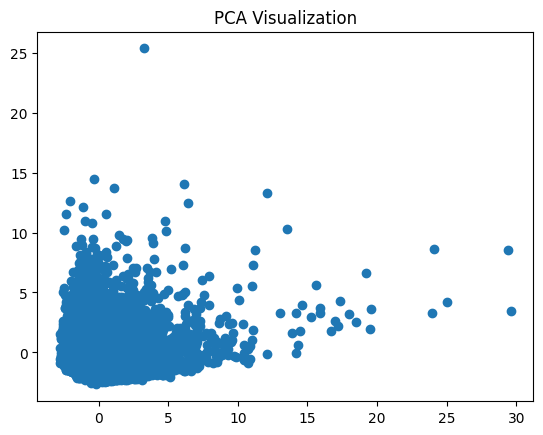

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled)

plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.title("PCA Visualization")
plt.show()


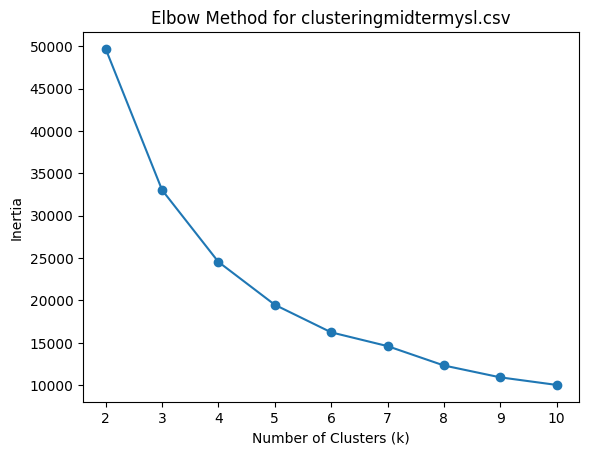

In [11]:
from sklearn.cluster import KMeans

inertias = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_features)
    inertias.append(km.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.title("Elbow Method for clusteringmidtermysl.csv")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels_km = kmeans.fit_predict(pca_features)

df["Cluster"] = labels_km


In [13]:
kmeans = KMeans(n_clusters=4)
labels_km = kmeans.fit_predict(pca_features)


In [14]:
labels_km[:20]   # 20 pertama


array([3, 1, 2, 3, 3, 2, 0, 2, 3, 3, 2, 3, 2, 2, 3, 1, 3, 3, 2, 2],
      dtype=int32)

In [15]:
df["Cluster"] = labels_km
df["Cluster"].value_counts()


,count
Cluster,
3,3918
2,3284
1,1246
0,502


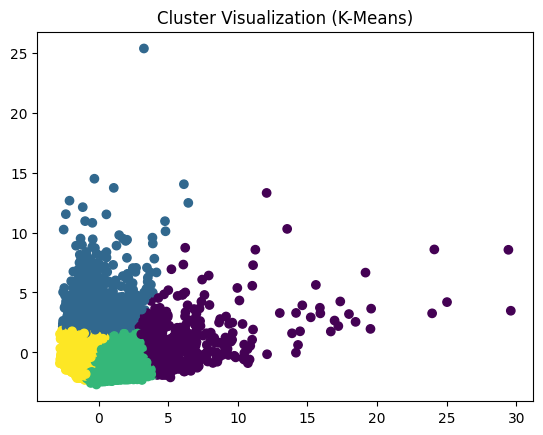

In [16]:
plt.scatter(pca_features[:,0], pca_features[:,1], c=labels_km, cmap='viridis')
plt.title("Cluster Visualization (K-Means)")
plt.show()


In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(pca_features, labels_km)


np.float64(0.40735966441145405)

In [19]:
import numpy as np
import pandas as pd

# Pastikan kolom cluster sudah ada
# df["Cluster"] = labels_km   # atau labels_latent

# Pilih hanya kolom numerik yang relevan (jangan CUST_ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Jika 'Cluster' termasuk di numeric_cols, hapus dulu agar tidak dihitung rata2 terhadap dirinya
if 'Cluster' in numeric_cols:
    numeric_cols.remove('Cluster')

# Sekarang groupby rata-rata dan jumlah anggota tiap cluster (pake data asli)
cluster_means = df.groupby('Cluster')[numeric_cols].mean()
cluster_counts = df['Cluster'].value_counts().sort_index()

display(cluster_counts)
display(cluster_means.round(3))


,count
Cluster,
0,502
1,1246
2,3284
3,3918


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,3407.930,0.988,6901.171,4516.913,2385.453,774.695,0.954,0.726,0.809,0.085,2.369,82.980,9548.705,6730.862,1831.213,0.287,11.960
1,4505.866,0.964,462.628,300.248,162.480,4400.456,0.266,0.130,0.166,0.471,13.774,6.717,7449.201,3542.539,2060.458,0.035,11.440
2,825.786,0.920,1237.583,622.593,615.196,147.719,0.863,0.302,0.675,0.031,0.570,21.329,4253.280,1329.970,583.424,0.283,11.662
3,1012.016,0.800,222.980,157.254,66.055,613.559,0.190,0.075,0.110,0.122,2.260,2.956,3108.960,855.313,551.136,0.066,11.364


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [21]:
input_dim = X.shape[1]
encoding_dim = 8   # latent dimension

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(16, activation='relu')(encoded)
bottleneck = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(16, activation='relu')(bottleneck)
decoded = layers.Dense(32, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='linear')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
encoder = models.Model(inputs=input_layer, outputs=bottleneck)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 17)             │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489 (9.72 KB)

 Trainable params: 2,489 (9.72 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = autoencoder.fit(
    scaled, scaled,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.8548 - val_loss: 0.4343
Epoch 2/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3932 - val_loss: 0.2195
Epoch 3/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2577 - val_loss: 0.1493
Epoch 4/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2042 - val_loss: 0.1232
Epoch 5/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1577 - val_loss: 0.1023
Epoch 6/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1234 - val_loss: 0.0909
Epoch 7/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1161 - val_loss: 0.0799
Epoch 8/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1039 - val_loss: 0.0711
Epoch 9/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0959 - val_loss: 0.0665
Epoch 10/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0867 - val_loss: 0.0625
Epoch 11/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0801 - val_loss: 0.0550
Epoch 12/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [23]:
latent_features = encoder.predict(scaled)
latent_features.shape


280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(8950, 8)

In [24]:
kmeans_latent = KMeans(n_clusters=4, random_state=42)
labels_latent = kmeans_latent.fit_predict(latent_features)


In [25]:
df["Cluster_AE"] = labels_latent


In [26]:
sil_score_latent = silhouette_score(latent_features, labels_latent)
print("Silhouette Score (Autoencoder + KMeans):", sil_score_latent)


Silhouette Score (Autoencoder + KMeans): 0.34459972


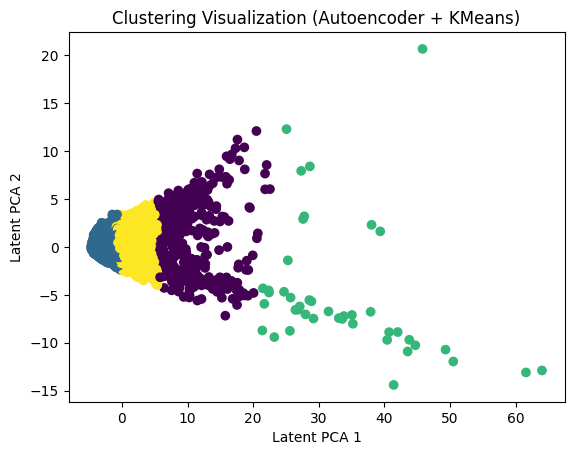

In [27]:
from sklearn.decomposition import PCA

pca_latent = PCA(n_components=2)
latent_2d = pca_latent.fit_transform(latent_features)

plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels_latent, cmap="viridis")
plt.title("Clustering Visualization (Autoencoder + KMeans)")
plt.xlabel("Latent PCA 1")
plt.ylabel("Latent PCA 2")
plt.show()


In [28]:
# contoh: jika labels_latent ada
df['Cluster_AE'] = labels_latent.astype(int)


In [29]:
df['Cluster_AE'] = pd.to_numeric(df['Cluster_AE'], errors='coerce').astype(int)


In [30]:
import numpy as np

# Ambil nama kolom numerik (angka) — ini otomatis mengecualikan CUST_ID kalau bertipe object
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Pastikan 'Cluster_AE' disertakan sebagai key groupby, tapi bukan bagian numeric_cols untuk mean
if 'Cluster_AE' in numeric_cols:
    numeric_cols.remove('Cluster_AE')

# Sekarang hitung jumlah per cluster dan rata-rata fitur numerik per cluster
cluster_counts = df.groupby('Cluster_AE').size()
cluster_means = df.groupby('Cluster_AE')[numeric_cols].mean()

display(cluster_counts)
display(cluster_means.round(3))


,0
Cluster_AE,
0,684
1,5389
2,43
3,2834


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
Cluster_AE,,,,,,,,,,,,,,,,,,
0,4586.887,0.975,3241.159,2066.335,1175.701,4140.928,0.619,0.413,0.482,0.421,14.058,42.944,8492.105,5769.028,2569.723,0.156,11.401,0.626
1,883.779,0.842,471.786,242.669,229.476,301.650,0.447,0.128,0.341,0.056,1.021,8.745,3593.120,873.516,458.971,0.120,11.827,2.582
2,6268.895,0.979,18923.684,12670.508,6253.176,4983.984,0.872,0.633,0.743,0.174,9.930,122.140,14446.512,21231.935,9506.422,0.390,11.930,0.163
3,2058.000,0.920,1201.678,718.548,483.185,1442.695,0.536,0.287,0.376,0.215,4.776,17.607,5091.991,2097.838,1031.070,0.214,10.950,1.842


In [35]:
import pandas as pd
import numpy as np

# Load dataset untuk clustering
df_cluster = pd.read_csv("clusteringmidtermysl.csv")

print("Dataset Shape:", df_cluster.shape)
display(df_cluster.head())

# Pilih hanya fitur numerik
X = df_cluster.select_dtypes(include=[np.number])
print("\nNumeric feature shape:", X.shape)


Dataset Shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Numeric feature shape: (8950, 17)


In [36]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

print("\nMissing values AFTER imputation:", np.isnan(X_imputed).sum())



Missing values AFTER imputation: 0


In [37]:
X_df = pd.DataFrame(X_imputed, columns=[f"f{i+1}" for i in range(X_imputed.shape[1])])


In [38]:
# Ringkasan awal
print("=== BEFORE OUTLIER HANDLING ===")
display(X_df.describe().T[['min','25%','50%','75%','max']].head())

# Hitung IQR
Q1 = X_df.quantile(0.25)
Q3 = X_df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Mask outlier
outlier_mask = (X_df < lower) | (X_df > upper)
outlier_counts = outlier_mask.sum().sort_values(ascending=False)

print("\n=== OUTLIER COUNT (Top 10 Columns) ===")
print(outlier_counts.head(10))

# Contoh nilai outlier dari kolom dengan paling banyak outlier
top_col = outlier_counts.idxmax()
print("\n=== EXAMPLE OUTLIERS IN COLUMN:", top_col, " ===")
display(X_df.loc[outlier_mask[top_col], top_col].head())


=== BEFORE OUTLIER HANDLING ===


,min,25%,50%,75%,max
f1,0.0,128.281915,873.385231,2054.140036,19043.13856
f2,0.0,0.888889,1.000000,1.000000,1.00000
f3,0.0,39.635000,361.280000,1110.130000,49039.57000
f4,0.0,0.000000,38.000000,577.405000,40761.25000
f5,0.0,0.000000,89.000000,468.637500,22500.00000



=== OUTLIER COUNT (Top 10 Columns) ===
f2     1493
f16    1474
f17    1366
f6     1030
f4     1013
f15     909
f5      867
f14     808
f3      808
f11     804
dtype: int64

=== EXAMPLE OUTLIERS IN COLUMN: f2  ===


,f2
3,0.636364
9,0.545455
17,0.454545
22,0.636364
39,0.454545


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

print("\n=== SCALING CHECK ===")
print("Mean (first 5 features):", X_scaled.mean(axis=0)[:5])
print("Std (first 5 features): ", X_scaled.std(axis=0)[:5])

# Contoh 5 baris pertama setelah scaling
print("\nFirst 5 rows after scaling:")
display(pd.DataFrame(X_scaled[:5, :5], columns=[f"f{i+1}" for i in range(5)]))



=== SCALING CHECK ===
Mean (first 5 features): [-2.54048799e-17  1.58780500e-16  3.17560999e-18 -6.03365899e-17
  3.17560999e-17]
Std (first 5 features):  [1. 1. 1. 1. 1.]

First 5 rows after scaling:


,f1,f2,f3,f4,f5
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576
2,0.447135,0.518084,-0.107668,0.108889,-0.454576
3,0.049099,-1.016953,0.232058,0.546189,-0.454576
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576


In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df_cluster['cluster'] = cluster_labels

print("\n=== CLUSTER ASSIGNMENTS (first 10 rows) ===")
display(df_cluster.head(10))



=== CLUSTER ASSIGNMENTS (first 10 rows) ===


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,2
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1


In [41]:
print("\n=== K-MEANS CENTROIDS ===")
display(pd.DataFrame(kmeans.cluster_centers_, columns=[f"f{i+1}" for i in range(X_df.shape[1])]))



=== K-MEANS CENTROIDS ===


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17
0,1.428391,0.384537,-0.199549,-0.138430,-0.217622,1.681226,-0.511254,-0.221546,-0.447748,1.736894,1.613215,-0.255695,0.813429,0.638296,0.533515,-0.400055,-0.095468
1,-0.298881,-0.371110,-0.328004,-0.231804,-0.349492,-0.214336,-0.611610,-0.372305,-0.544010,-0.156701,-0.196957,-0.431339,-0.349784,-0.278395,-0.130932,-0.207220,-0.090683
2,-0.132310,0.384892,0.553454,0.390106,0.591687,-0.354592,1.087013,0.626246,0.964102,-0.459989,-0.352847,0.725157,0.184470,0.150425,-0.021499,0.457975,0.168945
